In [1]:
import glob
import uproot
import numpy as np
#import h5py
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

In [2]:
XYZ =np.load("../SBT/SBT_XYZ.npy")

In [3]:
neu_files = glob.glob("../SBT/ml_dataset/*neuDIS*.root")
mu_files = glob.glob("../SBT/ml_dataset/*muDIS*.root")
embg_files = glob.glob("../SBT/ml_dataset/*EMBG*.root")
embg_files = glob.glob("../SBT/mynewsignal/*datafile*.root")

In [4]:
len(embg_files)

129

In [5]:
file = uproot.open(embg_files[0])
x = file['tree;1']['inputmatrix'].array()
x = np.array(x)
#N += x.shape[0]

In [6]:
to_concat = []
ys_concat = []
N=0
for i in range(0,180):
    file = uproot.open(neu_files[i])
    x = file['tree;1']['inputmatrix'].array()
    x = np.array(x)
    N += x.shape[0]
    new = np.vstack([ np.expand_dims(x[:,:2000],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
                    np.expand_dims(np.repeat(x[:,-5:-4],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-4:-3],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-3:-2],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-2:-1],2000,1),0)])
    new = np.swapaxes(new,0,1)
    new = np.swapaxes(new,1,2)
    to_concat.append(new)
ys_concat.append(np.ones((N)))
print(N)
N=0
for i in range(0,120):
    file = uproot.open(mu_files[i])
    x = file['tree;1']['inputmatrix'].array()
    x = np.array(x)
    N += x.shape[0]
    new = np.vstack([ np.expand_dims(x[:,:2000],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
                    np.expand_dims(np.repeat(x[:,-5:-4],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-4:-3],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-3:-2],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-2:-1],2000,1),0)])
    new = np.swapaxes(new,0,1)
    new = np.swapaxes(new,1,2)
    to_concat.append(new)
ys_concat.append(2*np.ones((N)))
print(N)
N=0
for i in range(0,9):
    file = uproot.open(embg_files[i])
    x = file['tree;1']['inputmatrix'].array()
    x = np.array(x)
    N += x.shape[0]
    new = np.vstack([ np.expand_dims(x[:,:2000],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
                    np.expand_dims(np.repeat(x[:,-5:-4],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-4:-3],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-3:-2],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-2:-1],2000,1),0)])
    new = np.swapaxes(new,0,1)
    new = np.swapaxes(new,1,2)
    to_concat.append(new)
print(N)
ys_concat.append(np.zeros((N)))

16115
16462
18000


In [7]:
X=np.concatenate(to_concat)

In [8]:
X[:,0,-1]

array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
XSBT = X[:,:,:4].copy()

In [10]:
XSBT.shape

(50577, 2000, 4)

In [11]:
#XSBT[:,0] = 0
#XSBT[:,:,4] = 0

In [12]:
#XSBT[:,:,4:] = 0

In [13]:
XUBT = X[:,0,-4:].copy()

In [14]:
XUBT

array([[-1.15297530e+00, -1.06650871e+01, -2.46806012e+03,
         0.00000000e+00],
       [ 2.27382430e+00, -2.73225196e+01,  2.59009559e+03,
         0.00000000e+00],
       [ 3.07086560e+01, -7.17960141e+01,  2.57988787e+03,
         0.00000000e+00],
       ...,
       [ 2.71419492e+01, -1.80422816e+02,  9.12488102e+02,
         0.00000000e+00],
       [-4.93972799e+01, -1.30067520e+02,  2.12675391e+03,
         0.00000000e+00],
       [ 3.53289543e+01, -2.39019450e+00, -2.17331841e+03,
         0.00000000e+00]])

In [15]:
#Xsig.shape

In [16]:
Xsig = X[:,0,3:].copy()

In [17]:
Xsig[:,0]=0
Xsig[:,-1]=1

In [18]:
Xsig.shape

(50577, 5)

In [19]:
XSBT.shape

(50577, 2000, 4)

In [20]:
Xsig.shape

(50577, 5)

In [21]:
XSBT[:,:,3]

array([[-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75],
       [-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75],
       [-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75],
       ...,
       [-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75],
       [-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75],
       [-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75]])

In [22]:
ys=np.concatenate(ys_concat)

In [23]:
def adjacency(n_dau):
    """ generates a fully connected adjacency
        for a mother to daughters """
    #A = np.diag(np.ones(n_dau+1))
    A = np.zeros((n_dau+1, n_dau+1))
    
    A[0,:] =1
    A[:,0] =1
    A[0,0]= 0
    return A
    

In [24]:
def adjacency2(n_dau):
    """ generates a fully connected adjacency
        for a mother to daughters """
    #A = np.diag(np.ones(n_dau+1))
    A=np.ones((n_dau+1, n_dau+1)) #- np.diag( [1]*(n_dau+1) )
    return A

In [25]:
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [26]:
X_SBT_train, X_SBT_val , X_sig_train, X_sig_val, X_UBT_train, X_UBT_val,  y_train, y_val   = train_test_split(XSBT, Xsig, XUBT, ys , test_size= 0.2,shuffle=True)

In [27]:
del XSBT
del  Xsig, XUBT
del X

In [28]:
del ys

In [29]:
X_SBT_train.shape

(40461, 2000, 4)

In [30]:
X_SBT_train[i].shape

(2000, 4)

In [31]:
import torch
from torch_geometric.nn import knn
k=5
kmeans = True

In [32]:
X_UBT_train[0].shape

(4,)

In [33]:
train_data=[]
Xs = []
globals = []
edges = []
j = 0

for i in range(X_SBT_train.shape[0]):
#for i in range(2):    
    #Xcon = np.concatenate([np.swapaxes(np.expand_dims(X_sig_train[i],1),0,1) , X_SBT_train[i][  X_SBT_train[i][:,0]>0 ]], 0)
    # add phi
    Xcon = X_SBT_train[i][ X_SBT_train[i][:,0]>0 ]
    #Xsig = X_UBT_train[i]
    Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
    if Xcon.shape[0] < 1:
        continue
    #Xs.append(Xcon)
    y = torch.tensor(y_train[i], dtype=torch.int64)

    Xcon2 = torch.tensor(Xcon, dtype=torch.float)
    if Xcon.shape[0] < 22:
        A = adjacency2(Xcon.shape[0]-1)
        edge_index =torch.tensor(A, dtype=torch.float).nonzero().t().contiguous() 
    else:
        k = 20
        assign_index = knn(Xcon2[1:], Xcon2[1:], k)
        assign_index = assign_index+1
        assign_index = assign_index[:,assign_index[0]!=assign_index[1]]
        edge_index = assign_index

    #print(edge_index.shape)
    if edge_index.shape[1] == 0:
        print(edge_index.shape)
    #print(edge_index.shape)

    #print((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2)
    if Xcon.shape[0] == 1:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,0)), dtype=torch.float)
    else:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,1)), dtype=torch.float)
    delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
    delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
    edge_features = torch.vstack([r, delta_z, delta_phi])
    edge_features = edge_features.T
    #bool = ~( ((edge_index[0] != 0) & (edge_index[1] != 0)) & (torch.abs(edge_features[:,1]) > 20))
    #edge_features = edge_features[bool]
    #edges.append(edge_features)

    #edge_index = torch.vstack( [edge_index[0][bool] , edge_index[1][bool]])
    #print(edge_index.shape)
    global_features = np.hstack([X_UBT_train[i] , np.array([Xcon.shape[0]]) ])

    global_features = torch.tensor(global_features, dtype=torch.float).unsqueeze(0)
    #globals.append(np.array(global_features))
    edgepos =  torch.tensor([j]*edge_index[0].shape[0],dtype=torch.int64)

    j += 1
    # edge_features = edge_scaler.transform(np.array(edge_features))
    # edge_features = torch.tensor(edge_features, dtype=torch.float)
    # global_features = global_scaler.transform(np.array(global_features))
    # global_features = torch.tensor(global_features, dtype=torch.float)
    # Xcon = node_scaler.transform(Xcon)
    Xcon = torch.tensor(Xcon, dtype=torch.float)
    train_data.append(Data(nodes=Xcon, edge_index=edge_index,y = y, edges = edge_features, graph_globals = global_features, edgepos=edgepos))

/tmp/ipykernel_31254/4046645671.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
/tmp/ipykernel_31254/4046645671.py:13: RuntimeWarning: divide by zero encountered in divide
  Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
/tmp/ipykernel_31254/4046645671.py:41: RuntimeWarning: divide by zero encountered in divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
/tmp/ipykernel_31254/4046645671.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_inde

In [34]:
val_data=[]
#Xs = []
#edges = [] 
j = 0

for i in range(X_SBT_val.shape[0]):
    
    Xcon = X_SBT_train[i][ X_SBT_train[i][:,0]>0 ]
    Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
    #Xsig = X_UBT_train[i]
    #Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1),
    #                 np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,0))])
    if Xcon.shape[0] <1:
        print("here")
        print(y_train[i])
        continue
    print("not there ")

    #Xs.append(Xcon)
    y = torch.tensor(y_train[i], dtype=torch.int64)

    Xcon2 = torch.tensor(Xcon, dtype=torch.float)
    if Xcon.shape[0] < 22:
        A = adjacency2(Xcon.shape[0]-1)
        edge_index =torch.tensor(A, dtype=torch.float).nonzero().t().contiguous() 
    else:
        k = 20
        assign_index = knn(Xcon2[1:], Xcon2[1:], k)
        assign_index = assign_index+1
        assign_index = assign_index[:,assign_index[0]!=assign_index[1]]
        edge_index = assign_index

    #print(edge_index.shape)
    #if edge_index.shape[1] == 0:
    #    print(edge_index.shape)
    
    
    #print(edge_index)
    #print(Xcon)
    
    if Xcon.shape[0] == 1:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,0)), dtype=torch.float)
    else:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,1)), dtype=torch.float)
    delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
    delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
    edge_features = torch.vstack([r, delta_z, delta_phi])
    edge_features = edge_features.T
    #edges.append(edge_features)
    #bool = ~( ((edge_index[0] != 0) & (edge_index[1] != 0)) & (torch.abs(edge_features[:,1]) > 20))
    #edge_features = edge_features[bool]
    
   #edge_index = torch.vstack( [edge_index[0][bool] , edge_index[1][bool]])    
    global_features = np.hstack([X_UBT_train[i] , np.array([Xcon.shape[0]]) ])
    global_features = torch.tensor(global_features, dtype=torch.float).unsqueeze(0)
    edgepos =  torch.tensor([j]*edge_index[0].shape[0],dtype=torch.int64)
    #print(edgepos)
    #print(edge_features.shape)
    #print(edge_index.shape)
    #print(Xcon.shape)
    #print(global_features.shape)
    # edge_features = edge_scaler.transform(np.array(edge_features))
    # edge_features = torch.tensor(edge_features, dtype=torch.float)
    # global_features = global_scaler.transform(np.array(global_features))
    # global_features = torch.tensor(global_features, dtype=torch.float)
    # Xcon = node_scaler.transform(Xcon)
    j += 1
    Xcon = torch.tensor(Xcon, dtype=torch.float)
    val_data.append(Data(nodes=Xcon, edge_index=edge_index,y = y, edges = edge_features, graph_globals = global_features, edgepos=edgepos))

not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
here
1.0
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 


/tmp/ipykernel_31254/2671991764.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
/tmp/ipykernel_31254/2671991764.py:9: RuntimeWarning: divide by zero encountered in divide
  Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
/tmp/ipykernel_31254/2671991764.py:46: RuntimeWarning: divide by zero encountered in divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)


not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
here
1.0
not there 
here
2.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
here
0.0
not there 
not th

/tmp/ipykernel_31254/2671991764.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)


not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
1.0
not there 
not there 
not there 
not there 
not there 
he

In [66]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

loader = DataLoader(train_data, batch_size=32 )#, shuffle=True)
valloader = DataLoader(val_data, batch_size=32 ) #shuffle=True)

In [67]:
STEP_SIZE = 2
MLP_OUTPUT_SIZE = 8
HIDDEN_CHANNELS = 64
NUM_LAYERS = 4
from sbtveto.model.gnn_model import EncodeProcessDecode
model=EncodeProcessDecode(mlp_output_size=MLP_OUTPUT_SIZE, global_op=3,num_blocks=6)

#myModel.cuda()
#device='cuda'
#optimizer = torch.optim.Adam(myModel.parameters(), lr=0.00005)
#optimizer = torch.optim.Adam(myModel.parameters(), lr=0.001)
#criterion = nn.CrossEntropyLoss(weight=weights)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

EncodeProcessDecode(
  (_encoder): MLPGraphIndependent(
    (_network): GraphIndependent(
      (_edge_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
      (_node_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
      (_global_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
    )
  )
  (_core): MLPGraphNetwork(
    (_network): GraphNetwork(
      (_edge_block): EdgeBlock(
        (_edge_model): MLP(-1, 128, 128, 128, 8)
      )
      (_node_block): NodeBlock(
        (_node_model): MLP(-1, 128, 128, 128, 8)
        (_sent_edges_aggregator): EdgesToNodesAggregator()
      )
      (_global_block): GlobalBlock(
        (_global_model): MLP(-1, 128, 128, 128, 8)
        (_edges_aggregator): EdgesToGlobalsAggregator()
        (_nodes_aggregator): NodesToGlobalsAggregator()
      )
    )
  )
  (_blocks): ModuleList(
    (0-5): 6 x MLPGraphNetwork(
      (_network): GraphNetwork(
        (_ed

In [68]:
losses = []
accuracy = []
vallosses = []
valaccuracy = []

In [69]:

optimizer_GCN = torch.optim.Adam(model.parameters(), lr=0.001)

criterion = torch.nn.CrossEntropyLoss()

#criterion = torch.nn.HuberLoss() 
for epoch in range(25):
    total = 0
    correct = 0
    valtotal = 0
    valcorrect = 0
    epoch_loss = 0 
    val_epoch_loss = 0
    if epoch == 20:
        optimizer_GCN = torch.optim.Adam(model.parameters(), lr=0.0001)
    
    for b in loader:
        b.to(device)

        #b['graph_globals'] = b['graph_globals'].unsqueeze(1)
        #b['edges'] = b['edges'].unsqueeze(1)
 #       print(b.nodes.shape)
        #print(b.edges.shape)
        #print(b.edgepos.shape)
        b['receivers'] = b.edge_index[1]
        b['senders'] = b.edge_index[0]
        #print(b.edgepos)
        b['edgepos'] = b['edgepos'] - torch.min(b['edgepos'])

        optimizer_GCN.zero_grad()
        #print("in shape ", b.x.shape)
        #print(b.edgepos)
        #print(b.edgepos.shape)
        #print(b.edges.shape)
        #print(b.graph_globals[b.edgepos])

        out = model(b)
        out = out['graph_globals']
        #print(out.shape)
        #print(b.y.shape)
        #print(model(b)['graph_globals'])
        #print(out)
        #.graph_globals
        #print(out.shape)
        #print(b.y.shape, out.shape)
        #out = out.squeeze(1)
        #print(b.y.shape, out.shape)
        loss = criterion(out, b.y) 



        loss.backward()
        optimizer_GCN.step()
        total += b.y.size(0)
        epoch_loss += loss.item()/32

        
        
    for b in valloader:
        #print("in cval ")
        b.to(device)
        #b['graph_globals'] = b['graph_globals'].unsqueeze(1)
        #b['edges'] = b['edges'].unsqueeze(1)
        b['receivers'] = b.edge_index[1]
        b['senders'] = b.edge_index[0]
        b['edgepos'] = b['edgepos'] - torch.min(b['edgepos'])
        
        out = model(b)['graph_globals']
        
        #out = out.squeeze(1)
        valloss = criterion(out, b.y)
       
        valtotal += b.y.size(0)
        val_epoch_loss += valloss.item()/32

        
            
        
    print("Epoch ", epoch)    
    print("Training Loss ", epoch_loss)
    #print("Training Accuracy % ", 100*correct/total)
    print("Val Loss ", val_epoch_loss)
    #print("Val Accuracy % ", 100*valcorrect/valtotal)
    losses.append(epoch_loss)
    #accuracy.append(100*correct/total)
    vallosses.append(val_epoch_loss)
    #valaccuracy.append(100*valcorrect/valtotal)
    print("")

Epoch  0
Training Loss  15.230217261589132
Val Loss  2.649998710723594

Epoch  1
Training Loss  9.438240965013392
Val Loss  2.227374864509329

Epoch  2
Training Loss  10.40196048252983
Val Loss  2.1534835727652535

Epoch  3
Training Loss  8.023138138640206
Val Loss  1.568798747495748

Epoch  4
Training Loss  6.786084407562157
Val Loss  1.3647680873982608

Epoch  5
Training Loss  6.061545478296466
Val Loss  1.2298819223651662

Epoch  6
Training Loss  6.358061997394543
Val Loss  1.1335516754188575

Epoch  7
Training Loss  7.568970819702372
Val Loss  1.1631468140985817

Epoch  8
Training Loss  4.812284267653013
Val Loss  1.0163335589313647

Epoch  9
Training Loss  4.757459718835889
Val Loss  1.0473653445078526

Epoch  10
Training Loss  4.7081882384372875
Val Loss  1.0685444055270636

Epoch  11
Training Loss  4.523638682439923
Val Loss  1.0129375779506518

Epoch  12
Training Loss  4.342721259163227
Val Loss  1.1042704184656031

Epoch  13
Training Loss  4.300938608939759
Val Loss  1.1164085

In [65]:
!ls

CM_GNN_CE_val_newdataset_new.png  NN.ipynb
CM_NN_CE_val_new.png		  SBT_vacuum_multiclass_4block_GNN.pt
GNN_global.ipynb		  sbtveto


In [70]:
torch.save(model.state_dict(), "SBT_vacuum_multiclass_6block_GNN.pt")

In [45]:
b.edgepos

tensor([ 0,  0,  0,  ..., 29, 29, 29], device='cuda:0')

In [46]:
b.batch

tensor([ 0,  0,  0,  ..., 29, 29, 29], device='cuda:0')

In [71]:
ypreds  = []
true = []
for b in valloader:
    b.to(device)
    #b['graph_globals'] = b['graph_globals'].unsqueeze(1)
    #b['edges'] = b['edges'].unsqueeze(1)
    b['receivers'] = b.edge_index[1]
    b['senders'] = b.edge_index[0]
    b['edgepos'] = b['edgepos'] - torch.min(b['edgepos'])
    out = model(b)["graph_globals"]
    out = out.squeeze(1)

    _, predicted = torch.max(out, dim = 1)
    true.append(b.y.detach().cpu().numpy())
    ypreds.append(predicted.cpu().detach().numpy())        
preds = np.concatenate(ypreds)
true = np.concatenate(true)

In [74]:
preds.shape

(9086,)

In [75]:
np.sum(preds == true)/true.shape[0]

0.9749064494827206

In [76]:
preds

array([1, 0, 0, ..., 2, 2, 1])

In [77]:
true[true==0]

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
labels=['signal',r'$\nu$-DIS', r'$\mu$-DIS']
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true, preds)

In [79]:
cmnew =cm/np.expand_dims(np.sum(cm,1),1)

In [80]:
np.expand_dims(np.sum(cm,1),1)

array([[2729],
       [3092],
       [3265]])

In [88]:
cm

array([[2721,    6,    2],
       [  17, 2985,   90],
       [   1,  112, 3152]])

In [82]:
100*9/(9+3+3050)

0.29392553886348793

In [83]:
1181/(1181+3)

0.9974662162162162

In [84]:
cmnew

array([[9.97068523e-01, 2.19860755e-03, 7.32869183e-04],
       [5.49805951e-03, 9.65394567e-01, 2.91073739e-02],
       [3.06278714e-04, 3.43032159e-02, 9.65390505e-01]])

In [85]:
import matplotlib.pyplot as plt

def plot_errorband(x, y, y_err, label, color):
    plt.plot(x, y, color=color, ls='solid', label=label)
    plt.fill_between(x, y_err[0],y_err[1], color=color, alpha=0.3, lw=0)
   
    
def init_thesis_plot_style():
    my_rc_params = {
        "xtick.direction": "in",
        "xtick.major.size": 8.0,
        "xtick.minor.size": 4.0,
        "xtick.minor.visible": True,
        "xtick.major.width": 1.2,
        "xtick.minor.width": 0.9,
        "ytick.direction": "in",
        "ytick.major.size": 8.0,
        "ytick.minor.size": 4.0,
        "ytick.minor.visible": True,
        "ytick.major.width": 1.2,
        "ytick.minor.width": 0.9,
        "errorbar.capsize": 2,
        "axes.linewidth": 1.2,
        # "font.familiy": "serif",
        "font.size": 14,
        "axes.grid": False,
        "ytick.right": True,
        "xtick.top": True
    }
    return(my_rc_params)
class Tango(object):
    scarlet_red_light = '#ef2929'
    scarlet_red = '#cc0000'
    scarlet_red_dark = '#a40000'

    aluminium_light = '#eeeeec'
    aluminium = '#d3d7cf'
    aluminium_dark = '#babdb6'

    butter_light = '#fce94f'
    butter = '#edd400'
    butter_dark = '#c4a000'

    chameleon_light = '#8ae234'
    chameleon = '#73d216'
    chameleon_dark = '#4e9a06'

    orange_light = '#fcaf3e'
    orange = '#f57900'
    orange_dark = '#ce5c00'

    chocolate_light = '#e9b96e'
    chocolate = '#c17d11'
    chocolate_dark = '#8f5902'

    sky_blue_light = '#729fcf'
    sky_blue = '#3465a4'
    sky_blue_dark = '#204a87'

    plum_light = '#ad7fa8'
    plum = '#75507b'
    plum_dark = '#5c3566'

    slate_light = '#888a85'
    slate = '#555753'
    slate_dark = '#2e3436'

init_thesis_plot_style()
plt.rcParams.update(init_thesis_plot_style())

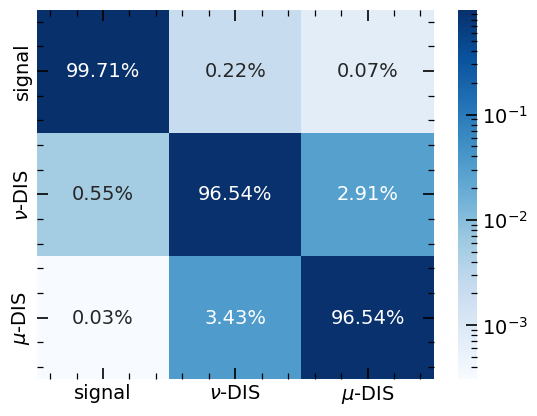

In [86]:
import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmnew, 
            fmt='.2%', norm= LogNorm(),
            annot=True,  xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.savefig('CM_GNN_CE_val_newdataset_new_6block.png')

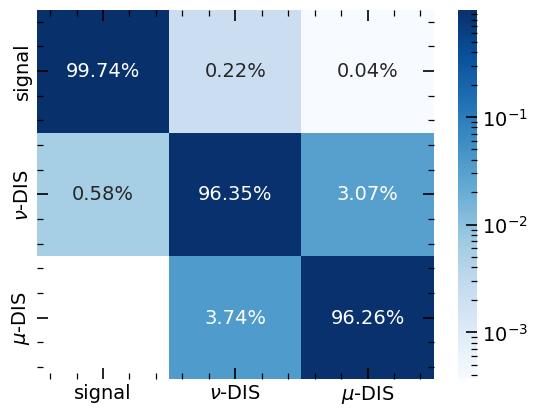

In [59]:
import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmnew, 
            fmt='.2%', norm= LogNorm(),
            annot=True,  xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.savefig('CM_GNN_CE_val_newdataset_new.png')

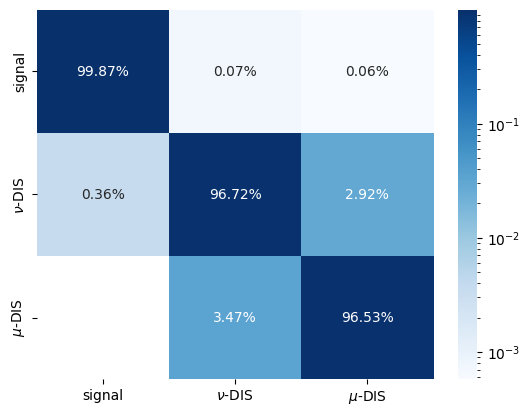

In [87]:
import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmnew, 
            fmt='.2%', norm= LogNorm(),
            annot=True,  xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.savefig('CM_GNN_CE_train.png')

In [69]:
cm

array([[3050,    3,    3],
       [   9, 3299,   95],
       [   0,  120, 3458]])

0.9979630264793249

In [71]:
9/(3050+3+3+3)

0.002942137953579601

In [80]:
len(ypred[true==2])

1212

In [77]:
ypred = preds

In [1]:
np.sum(ypred[true==0]==0)/len(ypred[true==0])

NameError: name 'np' is not defined

In [71]:
np.sum(ypred[true==0]==1)/len(ypred[true==0])

0.0008250825082508251

In [82]:
np.sum(ypred[true==2]==1)

1

In [73]:
np.sum(ypred[true==2]==0)/len(ypred[true==2])

0.007425742574257425

In [83]:
np.sum(ypred[true==2]==0)

9

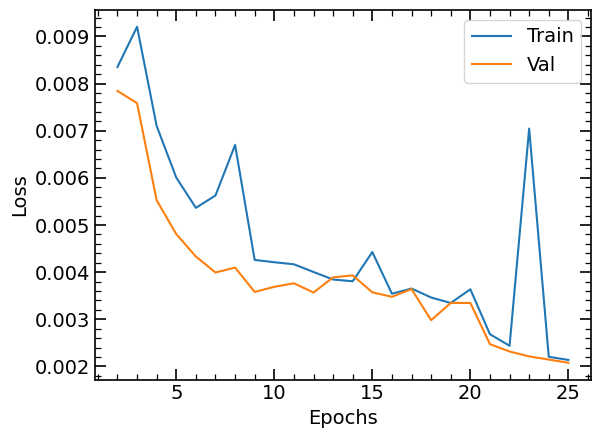

In [87]:
import matplotlib.pyplot as plt
epochs = np.arange(1, len(losses)+1)

plt.plot(epochs[1:],np.array(losses)[1:]*32./len(train_data), label="Train")
plt.plot(epochs[1:],np.array(vallosses)[1:]*32./len(val_data), label="Val")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [43]:
file = uproot.open(neu_files[0])
x = file['tree;1']['inputmatrix'].array()
x = np.array(x)

In [44]:
neu_files

['../SBT/ml_dataset/datafile_neuDIS_52_0_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_86_22_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_29_15_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_56_13_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_43_17_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_6_8_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_54_40_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_26_11_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_18_0_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_69_2_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_98_13_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_112_37_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_38_23_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_98_0_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_55_26_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_119_29_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_80_15_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_28_19_0.root',
 '../SBT/ml_dataset/datafile_neuDIS_30_46_0.root',
 '../SBT/ml_dataset/datafile_neuDIS

In [48]:
new.shape

(104, 2000, 8)

In [49]:
x = file['tree;1']['inputmatrix'].array()
x = np.array(x)
N += x.shape[0]
new = np.vstack([ np.expand_dims(x[:,:2000],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
          np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
          np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
                np.expand_dims(np.repeat(x[:,-5:-4],2000,1),0),
                np.expand_dims(np.repeat(x[:,-4:-3],2000,1),0),
                np.expand_dims(np.repeat(x[:,-3:-2],2000,1),0),
                np.expand_dims(np.repeat(x[:,-2:-1],2000,1),0)])
new = np.swapaxes(new,0,1)
new = np.swapaxes(new,1,2)
XSBT = new[:,:,:4].copy()

In [38]:
new.shape

(2000, 2000, 8)

In [ ]:
def gnn_output(model, x, XYZ,  device = "cpu"):
    Xcon = X_SBT_train[i][ X_SBT_train[i][:,0]>0 ]
    #Xsig = X_UBT_train[i]
    Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
    if Xcon.shape[0] < 1:
        return False

    Xcon2 = torch.tensor(Xcon, dtype=torch.float)
    if Xcon.shape[0] < 22:
        A = adjacency2(Xcon.shape[0]-1)
        edge_index =torch.tensor(A, dtype=torch.float).nonzero().t().contiguous() 
    else:
        k = 20
        assign_index = knn(Xcon2[1:], Xcon2[1:], k)
        assign_index = assign_index+1
        assign_index = assign_index[:,assign_index[0]!=assign_index[1]]
        edge_index = assign_index

    if edge_index.shape[1] == 0:
        print(edge_index.shape)

    if Xcon.shape[0] == 1:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,0)), dtype=torch.float)
    else:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,1)), dtype=torch.float)
    delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
    delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
    edge_features = torch.vstack([r, delta_z, delta_phi])
    edge_features = edge_features.T

    global_features = np.hstack([X_UBT_train[i] , np.array([Xcon.shape[0]]) ])


    edgepos =  torch.tensor([j]*edge_index[0].shape[0],dtype=torch.int64)

    j += 1

    Xcon = torch.tensor(Xcon, dtype=torch.float)
    train_data.append(Data(nodes=Xcon, edge_index=edge_index,y = y, edges = edge_features, graph_globals = global_features, edgepos=edgepos))